# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [1]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")
head(weatherPraga)

STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,⋯,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
EZE00100082,1775,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",246.3,NA,246.3,E,⋯,NA,,NA,,10.55,E,13.64,E,7.46,E
EZE00100082,1776,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",114.6,NA,114.6,E,⋯,3481.8,E,NA,,8.53,E,11.72,E,5.34,E
EZE00100082,1777,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",62.6,NA,62.6,E,⋯,3628.0,E,NA,,8.67,E,11.76,E,5.58,E
EZE00100082,1778,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",188.4,NA,188.4,E,⋯,3330.2,E,NA,,9.91,E,13.17,E,6.65,E
EZE00100082,1779,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",109.5,NA,109.5,E,⋯,3216.0,E,NA,,10.23,E,13.64,E,6.82,E
EZE00100082,1780,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",94.5,NA,94.5,E,⋯,3344.6,E,NA,,8.64,E,11.93,E,5.34,E


Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [2]:
precipitationsByYear <- weatherPraga[,c("DATE","PRCP")]
precipitationsByYearOrder <- precipitationsByYear[order(-precipitationsByYear$PRCP),]
head(precipitationsByYearOrder,10)

,DATE,PRCP
165,1939,745.5
54,1828,665.4
228,2002,661.5
172,1946,638.3
116,1890,637.3
63,1837,634.9
184,1958,633.1
57,1831,625.7
192,1966,624.1
55,1829,622.4


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)


Call:
lm(formula = weatherPraga$EMNT ~ weatherPraga$DATE, data = weatherPraga)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6098  -4.0003   0.5335   3.2636  11.2083 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -48.00664    9.17007  -5.235 3.74e-07 ***
weatherPraga$DATE   0.01738    0.00485   3.582 0.000416 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.884 on 228 degrees of freedom
Multiple R-squared:  0.05329,	Adjusted R-squared:  0.04913 
F-statistic: 12.83 on 1 and 228 DF,  p-value: 0.0004162


[1] "La temperatura mínima ha aumentado:  0.0173750305134395"


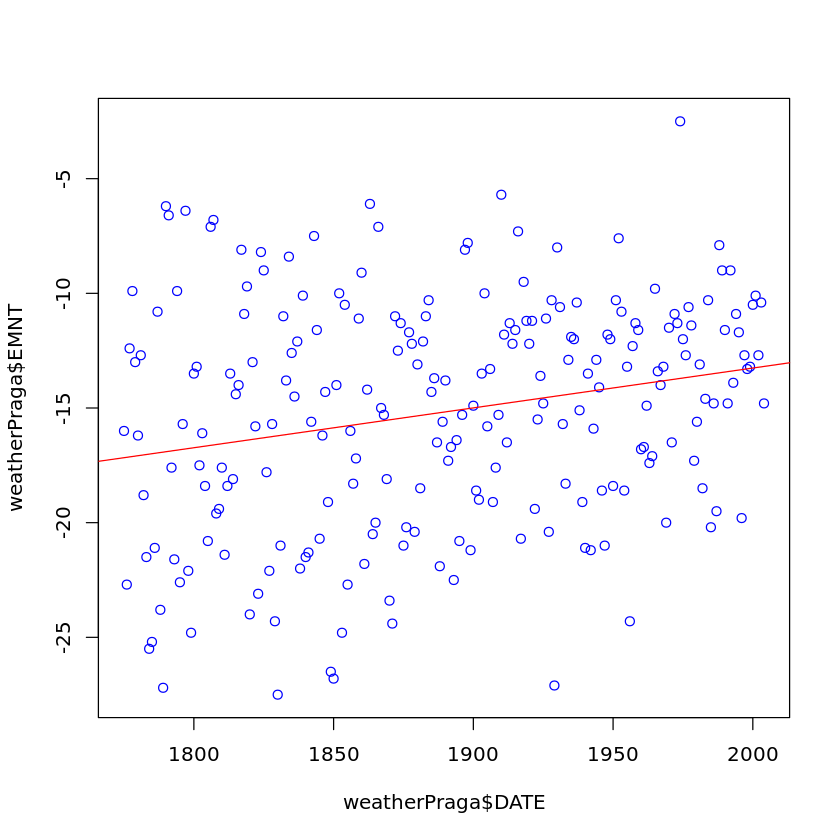

In [3]:
library("ggplot2")

plot(weatherPraga$DATE,weatherPraga$EMNT,col="blue")
model<-lm(data=weatherPraga, formula = weatherPraga$EMNT ~ weatherPraga$DATE)
abline(model$coefficients,col="red")
#ggplot(data=weatherPraga,aes(x=weatherPraga$DATE,y=weatherPraga$EMNT))+geom_point(size=1, color="blue")+geom_line(aes(weatherPraga$EMNT ~ weatherPraga$DATE))+
#    theme_bw()+xlab("Año")+ylab("Temperatura mínima")

summary(model)
print(paste("La temperatura mínima ha aumentado: ",model$coefficients[2]))

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [4]:
MinTemperaturesByYear <- weatherPraga[,c("DATE","EMNT")]
MinTemperaturesBy1775_1794 <- MinTemperaturesByYear[MinTemperaturesByYear$DATE>=1775 & MinTemperaturesByYear$DATE<=1794,]
MinTemperaturesBy1985_2004 <- MinTemperaturesByYear[MinTemperaturesByYear$DATE>=1785 & MinTemperaturesByYear$DATE<=2004,]
media1775_1794 <- (mean(MinTemperaturesBy1775_1794$EMNT, na.rm=T))
media1985_2004 <- (mean(MinTemperaturesBy1985_2004$EMNT, na.rm=T))
print(paste("La media de la temperatura mínima entre 1775 y 1794 es: ",media1775_1794))
print(paste("La media de la temperatura mínima entre 1985 y 2004 es: ",media1985_2004))
print(paste("La diferencia entre las medias es: ", (media1985_2004 - media1775_1794)))
if (media1985_2004 > media1775_1794) {
    print("Aparentemente ha subido la temperatura media")                   
} else {
    print("Aparentemente NO ha subido la temperatura media")
}

[1] "La media de la temperatura mínima entre 1775 y 1794 es:  -16.935"
[1] "La media de la temperatura mínima entre 1985 y 2004 es:  -15.0995454545455"
[1] "La diferencia entre las medias es:  1.83545454545454"
[1] "Aparentemente ha subido la temperatura media"


#### Ahora tenemos que comprobar si es estadísticamente siginificativo

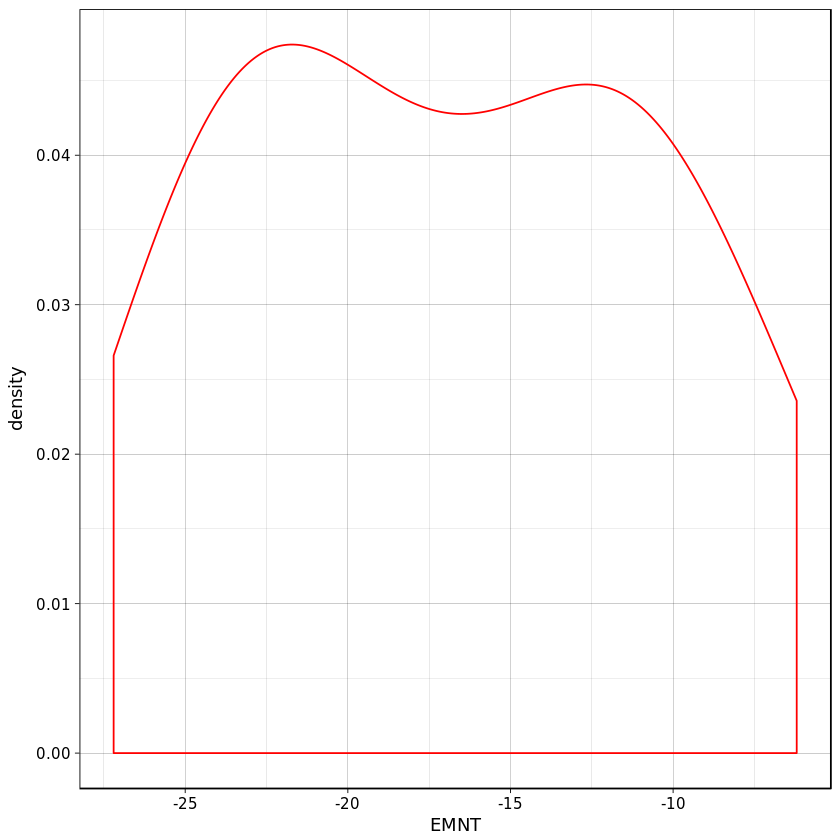

In [5]:
meanTemperatures1<-mean(MinTemperaturesBy1775_1794$EMNT)
sdTemperatures1<-sd(MinTemperaturesBy1775_1794$EMNT)

library(ggplot2)
ggplot(data=MinTemperaturesBy1775_1794,aes(x=EMNT))+
    geom_density(color="red")+
    theme_linedraw()

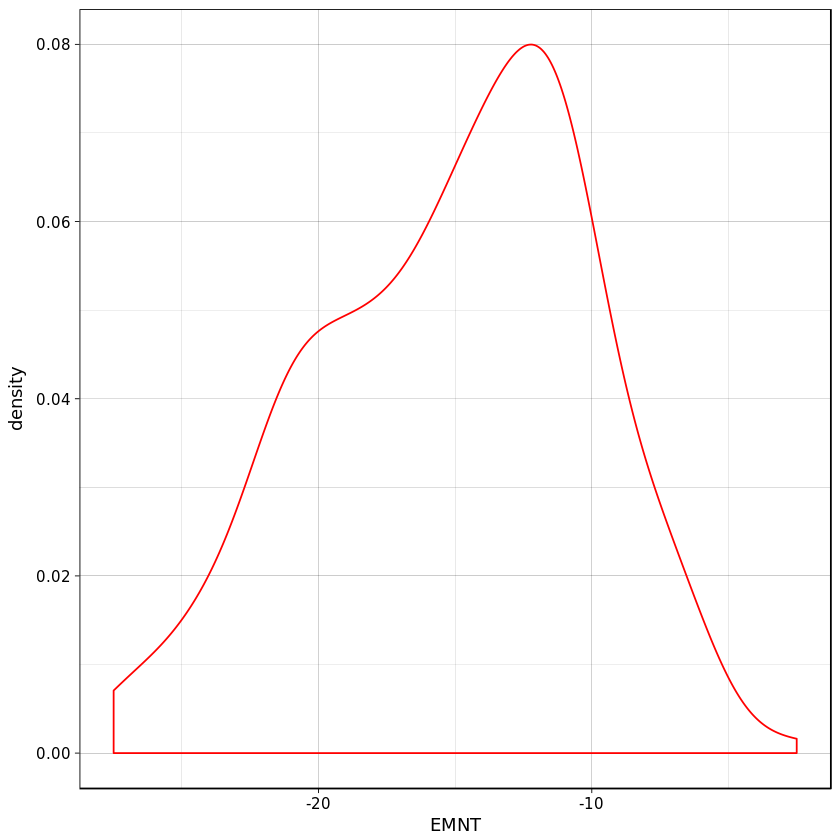

In [6]:
meanTemperatures2<-mean(MinTemperaturesBy1985_2004$EMNT)
sdTemperatures2<-sd(MinTemperaturesBy1985_2004$EMNT)

ggplot(data=MinTemperaturesBy1985_2004,aes(x=EMNT))+
    geom_density(color="red")+
    theme_linedraw()

In [7]:
suppressWarnings(library('zoo'))
MinTemperatures1hist <- hist(MinTemperaturesBy1775_1794$EMNT,breaks=20,right=FALSE,plot = FALSE)
MinTemperatures2hist <- hist(MinTemperaturesBy1985_2004$EMNT,breaks=20,right=FALSE,plot = FALSE)
breaks1<-MinTemperatures1hist$breaks
breaks1[1]<- -Inf
breaks1[length(breaks1)]<- Inf

breaks_cdf1 <- pnorm(breaks1, mean=meanTemperatures1, sd=sdTemperatures1)
ref.probs1 <- rollapply(data=breaks_cdf1, width=2, function(x) x[2]-x[1])

rbind(test=round(MinTemperatures1hist$density,4),reference=round(ref.probs1,4))
                        
breaks2<-MinTemperatures2hist$breaks
breaks2[1]<- -Inf
breaks2[length(breaks2)]<- Inf

breaks_cdf2 <- pnorm(breaks2, mean=meanTemperatures2, sd=sdTemperatures2)
ref.probs2 <- rollapply(data=breaks_cdf2, width=2, function(x) x[2]-x[1])

rbind(test=round(MinTemperatures2hist$density,4),reference=round(ref.probs2,4))                        


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



test,0.0500,0.0000,0.1000,0.0000,0.0500,0.0500,0.1500,0.0000,0.0000,0.0500,⋯,0.0500,0.0000,0.0000,0.1500,0.0000,0.0500,0.1000,0.0000,0.0000,0.1000
reference,0.0611,0.0208,0.0258,0.0312,0.0369,0.0425,0.0479,0.0527,0.0567,0.0595,⋯,0.0598,0.0571,0.0533,0.0486,0.0432,0.0376,0.0319,0.0265,0.0215,0.0635


test,0.0136,0.0091,0.0045,0.0227,0.0182,0.0227,0.0500,0.0545,0.0455,0.0591,⋯,0.1000,0.0909,0.0318,0.0318,0.0364,0.0227,0.0045,0.0000,0.0000,0.0045
reference,0.0087,0.0060,0.0092,0.0137,0.0195,0.0267,0.0352,0.0445,0.0541,0.0632,⋯,0.0615,0.0522,0.0426,0.0334,0.0252,0.0183,0.0127,0.0085,0.0055,0.0078


In [8]:
#Test chi-cuadrado para ver si siguen distribución normal
chisq.test(MinTemperatures1hist$density, p=ref.probs1)
chisq.test(MinTemperatures2hist$density, p=ref.probs2)
#chisq.test(x=MinTemperatures1hist$density,p=ref.probs,simulate.p.value = T)
#TODO: Test Fisher para ver si la varianza es la misma ???? ¿Es necesario esto? ¿Se hace así?
var.test(MinTemperatures1hist$density$EMNT,MinTemperatures2hist$density)


Warning message in chisq.test(MinTemperatures1hist$density, p = ref.probs1):
“Chi-squared approximation may be incorrect”


	Chi-squared test for given probabilities

data:  MinTemperatures1hist$density
X-squared = 1.191, df = 21, p-value = 1


Warning message in chisq.test(MinTemperatures2hist$density, p = ref.probs2):
“Chi-squared approximation may be incorrect”


	Chi-squared test for given probabilities

data:  MinTemperatures2hist$density
X-squared = 0.14178, df = 25, p-value = 1


ERROR: Error in MinTemperatures1hist$density$EMNT: $ operator is invalid for atomic vectors


**Parece que siguen una gaussiana, aplico el test unilateral** (derecho). Hipótesis:

* $H_0$ : La temperatura media es **menor o igual** en el periodo de 1985 - 2004 que en el periodo 1775 - 1794 
* $H_1$ : La temperatura media es **mayor** en el periodo de 1985 - 2004 que en el periodo 1775 - 1794 

In [12]:
tw<-t.test(MinTemperaturesBy1985_2004$EMNT,MinTemperaturesBy1775_1794$EMNT,alternative = "greater")
tw 
#shapiro.test(MinTemperaturesBy1775_1794$EMNT)
#shapiro.test(MinTemperaturesBy1985_2004$EMNT)


	Welch Two Sample t-test

data:  MinTemperaturesBy1985_2004$EMNT and MinTemperaturesBy1775_1794$EMNT
t = 1.2283, df = 21.088, p-value = 0.1164
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.7354162        Inf
sample estimates:
mean of x mean of y 
-15.09955 -16.93500 


El valor de pvalor no es lo suficientemente pequeño, por lo que no puedo rechazar la la hipótesis nula y quedarme con la hipótesis alternativa, con lo que no podemos concluir que la temperatura media haya subido.

## Datos banco mundial

Carga los datos del banco mundial

In [ ]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*

Nota: Este indicador nos da los valores en kt por lo que no es necesario hacer ninguna transformación


In [ ]:
databankCO2 <- databank[databank$Indicator.Code=="EN.ATM.GHGT.KT.CE",]
realCountryDataCO2 <- merge(realCountryData, databankCO2, by="Country.Code")
print(paste("El país que más toneladas de CO2 equivalente emitió en 1970 fue", 
            realCountryDataCO2[which.max(realCountryDataCO2$"1970"),"Country.Name"]))
print(paste("Contaminó",max(realCountryDataCO2$"1970",na.rm = TRUE),"kt"))


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [ ]:
realCountryDataCO2By2012Order <- realCountryDataCO2[order(-realCountryDataCO2$"2012"),]
for (i in 1:5)
    print(paste(realCountryDataCO2By2012Order[i,"Country.Name"], "emitió", realCountryDataCO2By2012Order[i,"2012"],"kt"))

¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [ ]:
library(reshape2)
#Aunque el paquete psych incluye una función geometric.mean hago una implementación manual(de lo visto en clase) por no instalarlo, 
#porque en principio se comentó que no necesitaríamos ningún paquete adicional, aunque se podría haber echo con la función 
#construida (geometric.mean) de ese paquete
myGeometricMean<-function(X,na.rm=F){
    if (na.rm){
        X<-na.omit(X)
    }
    m<-1
    for (xi in X){
        m<-m*xi        
    }
    m^(1/length(X))
}
dataCO2China2000_2012 <- realCountryDataCO2[realCountryDataCO2$Country.Code == "CHN",
                                                       c("2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012")]

dataCO2China2000_2012ByYear <- melt(dataCO2China2000_2012, value.name="CO2")
ratios <- c(NA, round(dataCO2China2000_2012ByYear[2:nrow(dataCO2China2000_2012ByYear), "CO2"]/dataCO2China2000_2012ByYear[1:nrow(dataCO2China2000_2012ByYear) - 1, "CO2"],4))
percentages <-round((ratios-1)*100,2)
dataCO2China2000_2012ByYear$ratio <- ratios
dataCO2China2000_2012ByYear$percentage <- percentages
mediaCrecimientoCO2 <- (myGeometricMean(dataCO2China2000_2012ByYear$ratio,na.rm=T)-1)*100
print(paste("La media del porcentaje de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012 es",round(mediaCrecimientoCO2,2),"%"))


Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2014 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

In [ ]:
#Primero preparo los datos antes de ponerme a pintar los gráficos
databankCO2PC <- databank[databank$Indicator.Code=="EN.ATM.CO2E.PC",]
realCountryDataCO2PC <- merge(realCountryData, databankCO2PC, by="Country.Code")
realCountryDataCO2PC1960_1990_2014 <- realCountryDataCO2PC[,c("Country.Name","1960","1990","2014")]
dataCO2PC <- melt(realCountryDataCO2PC1960_1990_2014,id=c("Country.Name"),na.rm=T)

In [ ]:
#Diagrama de cajas (#TODO: Ponerlo más bonito, con labels y colores)
ggplot(dataCO2PC,aes(x=dataCO2PC$variable,y=dataCO2PC$value,color=dataCO2PC$variable))+geom_boxplot()+theme_bw()

In [ ]:
# Histograma
ggplot(data=dataCO2PC, aes(x=dataCO2PC$value,fill=dataCO2PC$variable)) + 
geom_histogram(color="black",bins = 10, position="dodge")+xlab("Emisiones CO2 Per Capita(kt)")

In [ ]:
#Curvas de densidad
ggplot(data=dataCO2PC, aes(x=dataCO2PC$value,color=dataCO2PC$variable)) + 
    geom_density()

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

In [ ]:
#TODO: Poner un título guapo, sustituir Country.Code por los valores Mundo entero, Unión europea... etc...
regionDataCO2 <- merge(regionData, databankCO2, by="Country.Code")
regionDataCO2SubSet <- subset(regionDataCO2, Country.Code=="WLD" | Country.Code=="EUU" | Country.Code=="SSA" | Country.Code=="NAC" | Country.Code=="TEA")
years <- paste("", 1960:2017,sep="")
cols <- c("Country.Code", years)
regionDataCO2SubSet <- regionDataCO2SubSet[, cols]
regionDataCO2SubSet <- melt(regionDataCO2SubSet,id=c("Country.Code"), na.rm=T)
head(regionDataCO2SubSet)
escala <- c(1960,1970,1980,1990,2000,2010)
ggplot(data=regionDataCO2SubSet,aes(x=variable,y=value,color=Country.Code,shape=Country.Code))+geom_point(size=1.5)+
    scale_x_discrete(breaks=escala,labels=escala)+    
    theme_bw()+xlab("Años")+ylab("Emisiones CO2")+
    ggtitle("Comparación ")

Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

In [ ]:
#TODO: Revisar el plot del primer ejercicio(temperatura Praga) e intentar sustituir por ggplot
wldCO2 <- subset(regionDataCO2SubSet, Country.Code == "WLD", na.rm=T)
wldCO2$years <- as.numeric(levels(wldCO2$variable))[wldCO2$variable]
model1<-lm(data=wldCO2, formula = value ~ years)
wldCO2$yPredictModel1 <- predict(model1,wldCO2)
model3<-lm(data=wldCO2, formula = value ~ poly(years,3))
wldCO2$yPredictModel3 <- predict(model3,wldCO2)
model10<-lm(data=wldCO2, formula = value ~ poly(years,10))
wldCO2$yPredictModel10 <- predict(model10,wldCO2)
ggplot(data=wldCO2,aes(x=years))+geom_point(aes(y=value))+geom_line(aes(y=yPredictModel1),color="blue")+
    geom_line(aes(y=yPredictModel3), color="red")+
    geom_line(aes(y=yPredictModel10), color="orange")+
    theme_bw()+xlab("Años")+ylab("Emisiones CO2")

#ggplot(data=wldCO2,aes(x=variable,y=value))+geom_point(color="blue",size=1.5)+
#    scale_x_continuous(breaks=seq(1960,2010,length.out=5),labels=seq(1960,2010,length.out=5))+
#    geom_line(aes(x=variable,y=yPredictModel1), color="orange")+
#    geom_line(aes(x=variable,y=yPredictModel3), color="red")+
#    geom_line(aes(x=variable,y=yPredictModel10), color="black")+
#    theme_bw()+xlab("Años")+ylab("Emisiones CO2")+
#    ggtitle("Aquí un titulo guay")
#TODO: Ajustar la gráfica para que las líneas se extiendan hasta los límites del gráfico, o bien se recorta el cuadrado
#o se agrandan las lineas, me queda también que salga bien las coordenadas de x en los años y calcular el valor para 2020
#para los distintos polinomios
#summary(model10)


## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [ ]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

In [ ]:
databankCO2Emitido <- databank[databank$Indicator.Code=="EN.ATM.CO2E.KT",]
regionDataCO2Emitido <- merge(regionData, databankCO2PC, by="Country.Code")

wldCO2Emitido <- subset(regionDataCO2Emitido, Country.Code == "WLD", na.rm=T)
years <- paste("", 1960:2017,sep="")
wldCO2Emitido <- wldCO2Emitido[, years]
wldCO2Emitido <- melt(wldCO2Emitido,na.rm=T)
medias <- aggregate(co2ppm$interpolated, by=list(co2ppm$year), FUN=mean, na.rm=T)
colnames(wldCO2Emitido) <- c("year", "value")
wldCO2Emitido$year <- as.numeric(levels(wldCO2Emitido$year))[wldCO2Emitido$year]
colnames(medias) <- c("year","value")
wldCO2Emitido$region <- "WLD"
medias$region <- "Manuna Loa"
wldyHawaiCO2Emitido <- rbind(wldCO2Emitido,medias)
ggplot(data=wldyHawaiCO2Emitido,aes(x=year,y=value,color=region,shape=region))+geom_point(size=1.5)+
    scale_x_discrete(breaks=escala,labels=escala)+    
    theme_bw()+xlab("Años")+ylab("Emisiones CO2          CO2 Medido en la Atmósfera")+
    ggtitle("Comparación ")

Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [ ]:
#Preparamos los datos en un único data frame con los mismos rangos de fechas para todos
medias <- subset(medias[,c("year","value")], year>=1960 & year<=2002)
wldCO2Emitido <- subset(wldCO2Emitido[,c("year","value")], year>=1960 & year<=2002)
MinTemperaturesByYear <- subset(MinTemperaturesByYear, DATE>=1960 & DATE<=2002)
colnames(medias) <- c("year", "CO2Atmosfera")
colnames(wldCO2Emitido) <- c("year", "CO2Emitido")
colnames(MinTemperaturesByYear) <- c("year", "TMinPraga")
total<-merge(medias,wldCO2Emitido,by="year",all = T)
total<-merge(total,MinTemperaturesByYear,by="year",all = T)

cor(total[2:ncol(total)],use="complete.obs")


Podría haber una pequeña correlación entre el CO2 Emitido y el C02 medido en la atmósfera, mientras que la correlación
entre estas dos variables y la temperatura mínima de Praga es practicamente inexistente.